In [1]:
import sys
sys.path.append('Outputs_o1')
import matplotlib.pyplot as plt

import HF
import numpy as np

In [2]:
def plot_kspace(kspace):
    fig, ax = plt.subplots(figsize=(3,3),tight_layout=True)
    ax.scatter(*kspace.T,s=2)
    ax.set_aspect('equal')
    ax.set_xlabel('$k_x$')
    ax.set_ylabel('$k_y$')
def plot_matele(mat):
    fig, ax = plt.subplots(figsize=(3,3))
    ax.spy((mat))
    ax.set_title('$H_0$')
def plot_2d_bandstructure(ham,en):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    for i in range(en.shape[0]):
        ax.plot_trisurf(ham.k_space[:,0],ham.k_space[:,1],en[i])
def plot_high_symm_bandstructure(k_list,en,ax=None):
    if ax is None:
        fig, ax = plt.subplots()
    for e in en:
        k_abs=np.sqrt(np.diff(k_list[:,0])**2 + np.diff(k_list[:,1])**2)
        k_abs = np.concatenate([[0],np.cumsum(k_abs)])
        ax.plot(k_abs,e,color='k')
    Nk = (k_list.shape[0]-1)//4
    for i in range(5):
        ax.axvline(k_abs[Nk*i],ls='--',color='r')
    ax.set_xticks([k_abs[Nk*i] for i in range(5)],['$\Gamma$','K','M','$\Gamma$',"K'"])
    # ax.set_xlim([k_abs[0],k_abs[-1]])

    

In [3]:
import code_2111_01152_new_2

# Check k-space


In [5]:
ham=code_2111_01152_new_2.HartreeFockHamiltonian(N_shell=10)

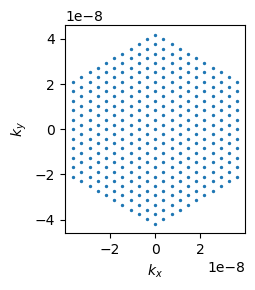

In [6]:
plot_kspace(kspace=ham.k_space)

Unit is not correct 

# Check Lincut/2D plot

In [10]:
ham=code_2111_01152_new_2.HartreeFockHamiltonian(N_shell=10)

In [11]:
h_nonint = ham.generate_non_interacting()

In [15]:
np.product(ham.D)

28

In [17]:
wf,en=HF.diagonalize(h_nonint.reshape((np.product(ham.D),np.product(ham.D),-1)))

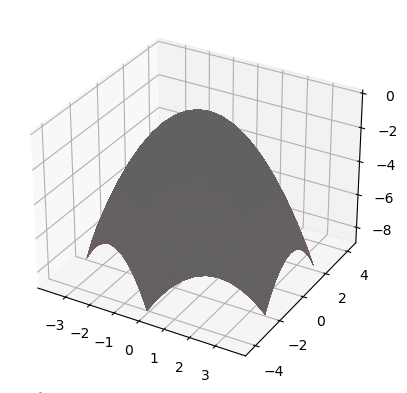

In [31]:
plot_2d_bandstructure(ham,en)

In [ ]:
Dispersion magnitude is too small

#  infinitesemial U limit

In [23]:
ham_int=code_2111_01152_new_2.HartreeFockHamiltonian(N_shell=10,parameters={'epsilon':100})

331

In [27]:
hamiltonian_int = HF.flattened_hamiltonian(ham_int.generate_non_interacting(), ham_int.D,ham_int.Nk)

In [28]:
wf,en=HF.diagonalize(hamiltonian_int)
exp_val=HF.get_exp_val(wf,en,0.5,0)

In [29]:
wf_int, en_int, exp_val=HF.solve(ham_int,0*exp_val,100)

AttributeError: 'HartreeFockHamiltonian' object has no attribute 'nu'

In [ ]:
Miss parameter for filling factor "nu"